In [20]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [21]:
#meshgrid
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
N = 51
x = numpy.linspace(-1.0, 2.0, N)
y = numpy.linspace(-0.5, 0.5, N)
X, Y = numpy.meshgrid(x, y)

In [22]:
X,Y

(array([[-1.  , -0.94, -0.88, ...,  1.88,  1.94,  2.  ],
        [-1.  , -0.94, -0.88, ...,  1.88,  1.94,  2.  ],
        [-1.  , -0.94, -0.88, ...,  1.88,  1.94,  2.  ],
        ..., 
        [-1.  , -0.94, -0.88, ...,  1.88,  1.94,  2.  ],
        [-1.  , -0.94, -0.88, ...,  1.88,  1.94,  2.  ],
        [-1.  , -0.94, -0.88, ...,  1.88,  1.94,  2.  ]]),
 array([[-0.5 , -0.5 , -0.5 , ..., -0.5 , -0.5 , -0.5 ],
        [-0.48, -0.48, -0.48, ..., -0.48, -0.48, -0.48],
        [-0.46, -0.46, -0.46, ..., -0.46, -0.46, -0.46],
        ..., 
        [ 0.46,  0.46,  0.46, ...,  0.46,  0.46,  0.46],
        [ 0.48,  0.48,  0.48, ...,  0.48,  0.48,  0.48],
        [ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ]]))

In [23]:
#import data files
x_source = numpy.loadtxt('../../AeroPython/lessons/resources/NACA0012_x.txt')
y_source = numpy.loadtxt('../../AeroPython/lessons/resources/NACA0012_y.txt')
sigma_source = numpy.loadtxt('../../AeroPython/lessons/resources/NACA0012_sigma.txt')
numpy.shape(x_source)

(100,)

In [24]:
import math

In [25]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [26]:
def get_stream_function(strength, xs, ys, X, Y):
    
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [27]:
#superpostion
u_source, v_source, psi_source= 0, 0, 0

for i in range(100):
    u_source1,v_source1 = get_velocity(sigma_source[i],x_source[i],y_source[i],X,Y)
    psi_source1 = get_stream_function(sigma_source[i],x_source[i],y_source[i],X,Y)
    
    u_source = u_source1+u_source
    v_source = v_source1+v_source
    psi_source = psi_source1+psi_source

In [28]:
u_source

array([[-0.00542396, -0.00569564, -0.00596639, ..., -0.00482657,
        -0.00458448, -0.004351  ],
       [-0.00560364, -0.00590372, -0.00620808, ..., -0.00498151,
        -0.004719  , -0.00446816],
       [-0.00578227, -0.00611129, -0.00645013, ..., -0.00513539,
        -0.0048522 , -0.00458389],
       ..., 
       [-0.00578227, -0.00611129, -0.00645013, ..., -0.00513539,
        -0.0048522 , -0.00458389],
       [-0.00560364, -0.00590372, -0.00620808, ..., -0.00498151,
        -0.004719  , -0.00446816],
       [-0.00542396, -0.00569564, -0.00596639, ..., -0.00482657,
        -0.00458448, -0.004351  ]])

In [29]:
v_source

array([[-0.00474589, -0.00532699, -0.00599976, ...,  0.00416002,
         0.00372528,  0.0033467 ],
       [-0.00465155, -0.00523107, -0.00590449, ...,  0.0040745 ,
         0.00364276,  0.00326787],
       [-0.00454845, -0.00512474, -0.00579686, ...,  0.00398153,
         0.00355395,  0.00318369],
       ..., 
       [ 0.00454845,  0.00512474,  0.00579686, ..., -0.00398153,
        -0.00355395, -0.00318369],
       [ 0.00465155,  0.00523107,  0.00590449, ..., -0.0040745 ,
        -0.00364276, -0.00326787],
       [ 0.00474589,  0.00532699,  0.00599976, ..., -0.00416002,
        -0.00372528, -0.0033467 ]])

In [30]:
psi_source

array([[ 0.00287556,  0.00317733,  0.00351663, ...,  0.00320127,
         0.00296501,  0.00275311],
       [ 0.00276529,  0.00306134,  0.00339489, ...,  0.00310318,
         0.00287198,  0.00266492],
       [ 0.00265143,  0.00294118,  0.00326831, ...,  0.00300201,
         0.00277626,  0.00257439],
       ..., 
       [-0.00265143, -0.00294118, -0.00326831, ..., -0.00300201,
        -0.00277626, -0.00257439],
       [-0.00276529, -0.00306134, -0.00339489, ..., -0.00310318,
        -0.00287198, -0.00266492],
       [-0.00287556, -0.00317733, -0.00351663, ..., -0.00320127,
        -0.00296501, -0.00275311]])

In [31]:
#free stream
u_inf = 1.0

u_freestream = u_inf * numpy.ones((N, N))
v_freestream = numpy.zeros((N, N))
psi_freestream = u_inf * Y

In [32]:
#superpostion of freestream and set of sources
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

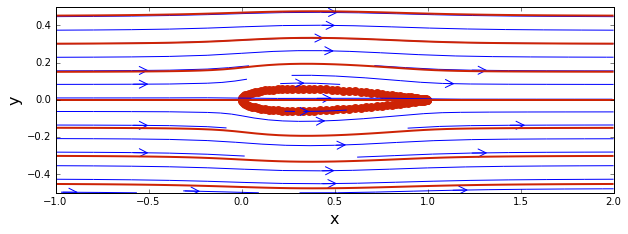

In [33]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter([x_source], [y_source], 
            color='#CD2305', s=80, marker='o', linewidth=0)
pyplot.contour(X, Y, psi,  
            colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.streamplot(X, Y, u, v, density=0.5, linewidth=1, arrowsize=2, arrowstyle='->');

In [34]:
# computes the max pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2
cp_max = numpy.max(cp)
cp_max

0.47144366133162408

In [35]:
numpy.where(cp == numpy.max(cp))

(array([25]), array([16]))

In [36]:
x_max = x[ numpy.where(cp == numpy.min(cp))[1][0] ]
y_max = y[ numpy.where(cp == numpy.min(cp))[0][0] ]
print(x_max, y_max)

0.02 0.0


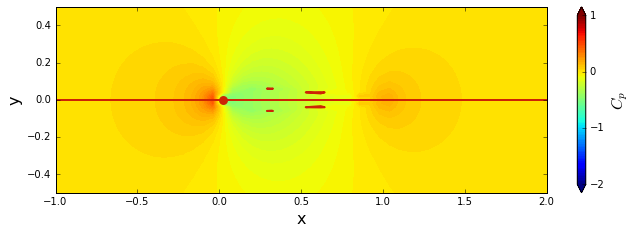

In [37]:
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_max, y_max, color='#CD2305', s=80, marker='o', linewidth=0);

In [19]:
cp

array([[ 0.01079599,  0.01133045,  0.01186118, ...,  0.00961254,
         0.00913407,  0.00867186],
       [ 0.01115424,  0.01174522,  0.01234275, ...,  0.0099216 ,
         0.00940245,  0.00890569],
       [ 0.01151041,  0.01215898,  0.01282506, ...,  0.01022856,
         0.00966822,  0.00913663],
       ..., 
       [ 0.01151041,  0.01215898,  0.01282506, ...,  0.01022856,
         0.00966822,  0.00913663],
       [ 0.01115424,  0.01174522,  0.01234275, ...,  0.0099216 ,
         0.00940245,  0.00890569],
       [ 0.01079599,  0.01133045,  0.01186118, ...,  0.00961254,
         0.00913407,  0.00867186]])